In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#### Attribute Information:
attr = '''1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises: yes=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d'''

d = {}
for s in attr.split('\n'):
    feat = s.split()[1][:-1]
    ctg = re.findall(r'(\w+)=([\?\w])',s)
    print(feat,ctg[0])
    for item in ctg:
        col_old_name = feat + '_' + item[1]
        col_new_name = feat + '_' + item[0]
        d[col_old_name] = col_new_name
d['class_p'] = 'poisonous'

cap-shape ('bell', 'b')
cap-surface ('fibrous', 'f')
cap-color ('brown', 'n')
bruises ('yes', 't')
odor ('almond', 'a')
gill-attachment ('attached', 'a')
gill-spacing ('close', 'c')
gill-size ('broad', 'b')
gill-color ('black', 'k')
stalk-shape ('enlarging', 'e')
stalk-root ('bulbous', 'b')
stalk-surface-above-ring ('fibrous', 'f')
stalk-surface-below-ring ('fibrous', 'f')
stalk-color-above-ring ('brown', 'n')
stalk-color-below-ring ('brown', 'n')
veil-type ('partial', 'p')
veil-color ('brown', 'n')
ring-number ('none', 'n')
ring-type ('cobwebby', 'c')
spore-print-color ('black', 'k')
population ('abundant', 'a')
habitat ('grasses', 'g')


In [3]:
df = pd.read_csv('mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<ol >
<li>cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
<li>cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
<li>cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
<li>bruises: yes=t,no=f
<li>odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
<li>gill-attachment: attached=a,descending=d,free=f,notched=n
<li>gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
<li>stalk-shape: enlarging=e,tapering=t
<li>stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
<li>stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
<li>stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
<li>stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
<li>stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
<li>veil-color: brown=n,orange=o,white=w,yellow=y
<li>ring-number: none=n,one=o,two=t
<li>ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
<li>spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
<li>population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
<li>habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
</ol>

In [5]:
cols_to_transform = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

# cols_to_transform = df.columns

# cols_to_transform = ['class', 'cap-color','cap-shape']

df_with_dummies = pd.get_dummies(data=df[cols_to_transform], columns=cols_to_transform)

In [6]:
df_with_dummies.rename(columns=d, inplace=True)
df_with_dummies.drop(['class_e'], axis=1,inplace=True)
df_with_dummies.head(2)

,poisonous,cap-shape_bell,cap-shape_conical,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-shape_convex,cap-surface_fibrous,cap-surface_grooves,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_woods,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [7]:
data = df_with_dummies
data.to_pickle('mushrooms_alldummies.pkl')
X = data.iloc[:,1:]
y = data.iloc[:,0]

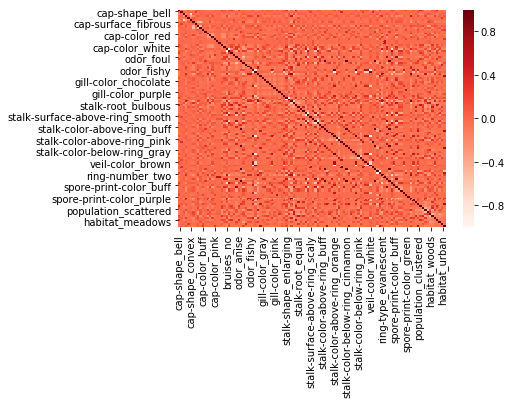

In [8]:
sns.heatmap(X.corr(),cmap='Reds')

In [9]:
df[df['class']=='p']['spore-print-color'].value_counts()

w    1812
h    1584
k     224
n     224
r      72
Name: spore-print-color, dtype: int64

In [10]:
df['spore-print-color'].value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
y      48
u      48
b      48
o      48
Name: spore-print-color, dtype: int64

In [11]:
for col in data.columns:
    print(col)

poisonous
cap-shape_bell
cap-shape_conical
cap-shape_flat
cap-shape_knobbed
cap-shape_sunken
cap-shape_convex
cap-surface_fibrous
cap-surface_grooves
cap-surface_smooth
cap-surface_scaly
cap-color_buff
cap-color_cinnamon
cap-color_red
cap-color_gray
cap-color_brown
cap-color_pink
cap-color_green
cap-color_purple
cap-color_white
cap-color_yellow
bruises_no
bruises_yes
odor_almond
odor_creosote
odor_foul
odor_anise
odor_musty
odor_none
odor_pungent
odor_spicy
odor_fishy
gill-attachment_attached
gill-attachment_free
gill-color_buff
gill-color_red
gill-color_gray
gill-color_chocolate
gill-color_black
gill-color_brown
gill-color_orange
gill-color_pink
gill-color_green
gill-color_purple
gill-color_white
gill-color_yellow
stalk-shape_enlarging
stalk-shape_tapering
stalk-root_missing
stalk-root_bulbous
stalk-root_club
stalk-root_equal
stalk-root_rooted
stalk-surface-above-ring_fibrous
stalk-surface-above-ring_silky
stalk-surface-above-ring_smooth
stalk-surface-above-ring_scaly
stalk-surface-be

In [12]:
data.tail()

,poisonous,cap-shape_bell,cap-shape_conical,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-shape_convex,cap-surface_fibrous,cap-surface_grooves,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_woods,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [13]:
for i in range(len(data.sum(axis=0))):
    print(data.sum(axis=0)[i],'\t', data.sum(axis=0).index[i])


3916 	 poisonous
452 	 cap-shape_bell
4 	 cap-shape_conical
3152 	 cap-shape_flat
828 	 cap-shape_knobbed
32 	 cap-shape_sunken
3656 	 cap-shape_convex
2320 	 cap-surface_fibrous
4 	 cap-surface_grooves
2556 	 cap-surface_smooth
3244 	 cap-surface_scaly
168 	 cap-color_buff
44 	 cap-color_cinnamon
1500 	 cap-color_red
1840 	 cap-color_gray
2284 	 cap-color_brown
144 	 cap-color_pink
16 	 cap-color_green
16 	 cap-color_purple
1040 	 cap-color_white
1072 	 cap-color_yellow
4748 	 bruises_no
3376 	 bruises_yes
400 	 odor_almond
192 	 odor_creosote
2160 	 odor_foul
400 	 odor_anise
36 	 odor_musty
3528 	 odor_none
256 	 odor_pungent
576 	 odor_spicy
576 	 odor_fishy
210 	 gill-attachment_attached
7914 	 gill-attachment_free
1728 	 gill-color_buff
96 	 gill-color_red
752 	 gill-color_gray
732 	 gill-color_chocolate
408 	 gill-color_black
1048 	 gill-color_brown
64 	 gill-color_orange
1492 	 gill-color_pink
24 	 gill-color_green
492 	 gill-color_purple
1202 	 gill-color_white
86 	 gill-color

In [18]:
cols_to_drop = ['cap-shape_conical',
                'cap-surface_grooves',
                'cap-color_yellow',
                'bruises_no',
                'odor_none',
                'gill-attachment_free',                       
                'gill-color_yellow',
                'stalk-shape_tapering',
                'stalk-root_missing',
                'stalk-surface-above-ring_fibrous',
                'stalk-surface-below-ring_fibrous',
                'stalk-color-above-ring_yellow',
                'stalk-color-below-ring_yellow',
                'veil-color_yellow',
                'ring-number_none',
                'ring-type_none',
                'spore-print-color_yellow',
                'population_abundant',
                'habitat_waste'
                ]
# 'gill-spacing_close','gill-size_narrow','veil-type_partial',
new_data = data.drop(cols_to_drop,axis=1)


In [19]:
len(cols_to_drop)

19

In [21]:
new_data.to_pickle('mushrooms.pkl')